# Алгоритмы кластеризации в дистрибутивной семантике

*Программа демонстрирует применение алгоритмов четкой **k-means (KM)** и нечеткой **c-means (FCM)** кластеризации для группировки слов, которые встречаются в схожем контексте повествования. Слова русского языка моделируются с помощью векторов (размерность которых много меньше словаря), полученных в результате работы нейросетевого алгоритма дистрибутивной семантики **word2vec (skip-gram)**.*

Для анализа используются модели дистрибутивной семантики **word2vec (skip-gram)**, построенные на основе заметок о банках () и телекоммуникационных компаниях ().
Данные взяты с официального сайта конференции **ДИАЛОГ-21** (Источник: *Loukachevitch N.V., Blinov P.D., Kotelnikov E.V., Rubtsova Yu.V., Ivanov V.V., Tutubalina E. (2015), SentiRuEval: Testing Object-oriented Sentiment Analysis Systems in Russian, Proceedings of International Conference Dialog.*).

Были подготовлены модели со следующими параметрами:
- Размерность вектора признаков - 300, минимальное число вхождений слова - 20, размер контекстного окна - 10.
    - Банки - 300features_20minwords_10context_bank
    - Телекоммуникационные компании  - 300features_20minwords_10context_ttk
    - Банки и телекоммуникационные компании - 300features_20minwords_10context_full
- Размерность вектора признаков - 300, минимальное число вхождений слова - 40, размер контекстного окна - 10.
    - Банки - 300features_40minwords_10context_bank
    - Телекоммуникационные компании  - 300features_40minwords_10context_ttk
    - Банки и телекоммуникационные компании - 300features_40minwords_10context_full

Также рассмотрены более масштабные модели, обученные на больших корпусах текстовых данных (Источник: ).
- 1
- 2

Импорт библиотеки с алгоритмами дистрибутивной семантики (в частности word2vec) (Источник: https://radimrehurek.com/gensim).

In [1]:
from gensim.models import Word2Vec

Загрузка модели и вывод нескольких слов.

In [2]:
model = Word2Vec.load("models/300features_40minwords_10context_full")

In [3]:
word_vectors = model.syn0
words = model.index2word

In [4]:
print 'Всего слов в модели:', len(word_vectors)
for ix, word in enumerate(words[:2]):
    print word
    print word_vectors[ix]

Всего слов в модели: 863
нормальный
[  7.35972300e-02  -1.73721258e-02  -8.33373237e-03  -8.55356082e-02
  -8.18823725e-02   1.52632017e-02   3.70077789e-02  -2.36464497e-02
  -8.25332012e-03  -1.67435464e-02  -6.60241768e-02   2.79846117e-02
   9.24787205e-03  -3.98905426e-02   3.57231218e-03  -5.00013679e-02
  -7.53037184e-02  -6.64497772e-03   4.34193164e-02  -4.20427360e-02
  -3.90998134e-03   1.52086198e-01   2.85693025e-03  -5.56157716e-02
  -2.46287418e-05  -5.23237512e-02   1.64605714e-02  -1.01002485e-01
  -1.90105531e-02   2.37178952e-02  -2.95395125e-02  -3.49427164e-02
   2.28135344e-02   4.73731421e-02  -3.56218293e-02  -1.12824179e-01
  -8.25599357e-02   4.29842509e-02  -1.60296366e-03  -5.57542369e-02
   1.97009277e-02   3.87912430e-02  -5.26472777e-02  -7.46402517e-02
   1.53806049e-03  -6.20090254e-02   5.13784289e-02   3.92956845e-02
   4.71740924e-02  -3.27854529e-02   2.73281969e-02  -5.38330600e-02
   4.87867035e-02  -3.58040631e-02  -4.64336313e-02   7.46139288e-0

Представление слов модели на плоскости, с помощью метода главных компонент (PCA).

In [5]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components)
pca_vectors = pca.fit_transform(word_vectors)

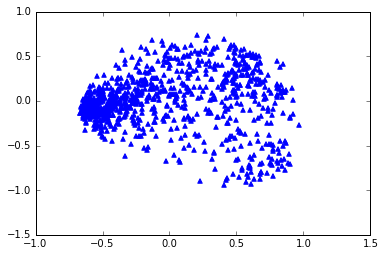

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(pca_vectors[:, 0],
            pca_vectors[:, 1],
            marker='^',
            color='b')

Положение первых 100 слов.

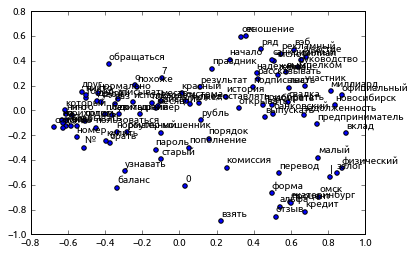

In [8]:
from matplotlib import rc
rc('font', family='Ubuntu')
plt.scatter(pca_vectors[:100, 0],
            pca_vectors[:100, 1])
for label, x, y in zip(words, pca_vectors[:100, 0], pca_vectors[:100, 1]):
    plt.annotate(
        label,
        (x, y),
        xytext=(0, 3),
        textcoords = 'offset points', 
        ha = 'left', 
        va = 'bottom'
    )

Кластеризация массива слов с помощью алгоритма **KM** при *n* (число кластеров) от 2 до 5 (Источник: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

Для n_clusters = 2 Среднее значение silhouette_score равно: 0.290912
Для n_clusters = 3 Среднее значение silhouette_score равно: 0.287884
Для n_clusters = 4 Среднее значение silhouette_score равно: 0.211119
Для n_clusters = 5 Среднее значение silhouette_score равно: 0.168479
Для n_clusters = 2 Среднее значение silhouette_score равно: 0.507181
Для n_clusters = 3 Среднее значение silhouette_score равно: 0.535297
Для n_clusters = 4 Среднее значение silhouette_score равно: 0.465958
Для n_clusters = 5 Среднее значение silhouette_score равно: 0.424769
Для n_clusters = 6 Среднее значение silhouette_score равно: 0.440187
Для n_clusters = 7 Среднее значение silhouette_score равно: 0.412909
Для n_clusters = 8 Среднее значение silhouette_score равно: 0.421483
Для n_clusters = 9 Среднее значение silhouette_score равно: 0.382733
Для n_clusters = 10 Среднее значение silhouette_score равно: 0.385253
Для n_clusters = 11 Среднее значение silhouette_score равно: 0.375932
Для n_clusters = 12 Среднее знач

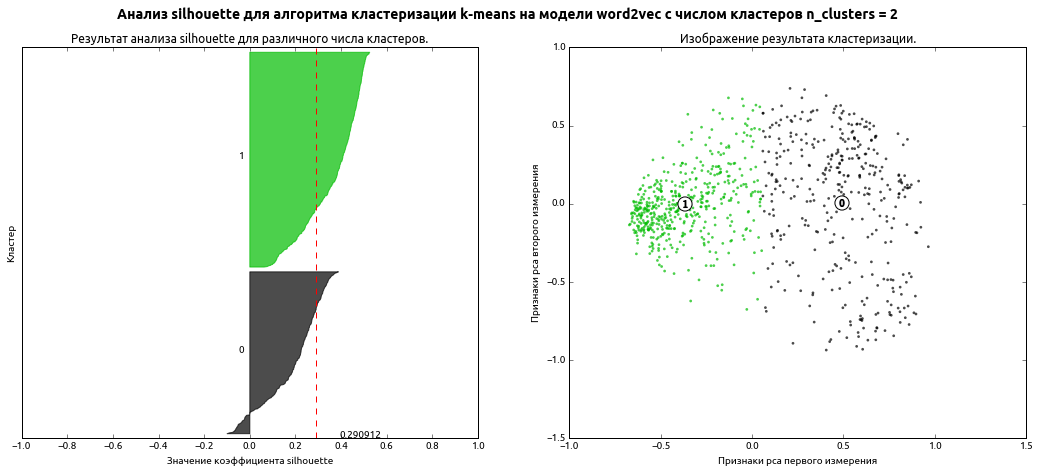

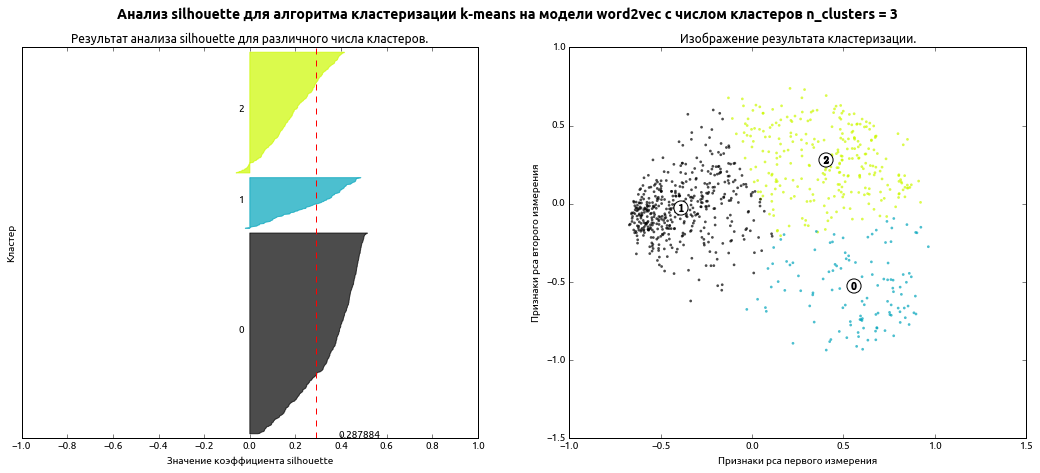

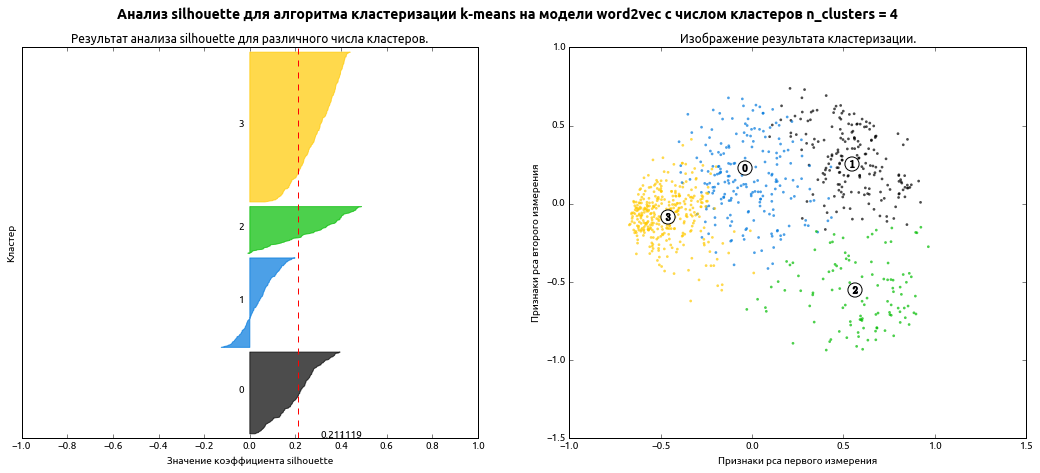

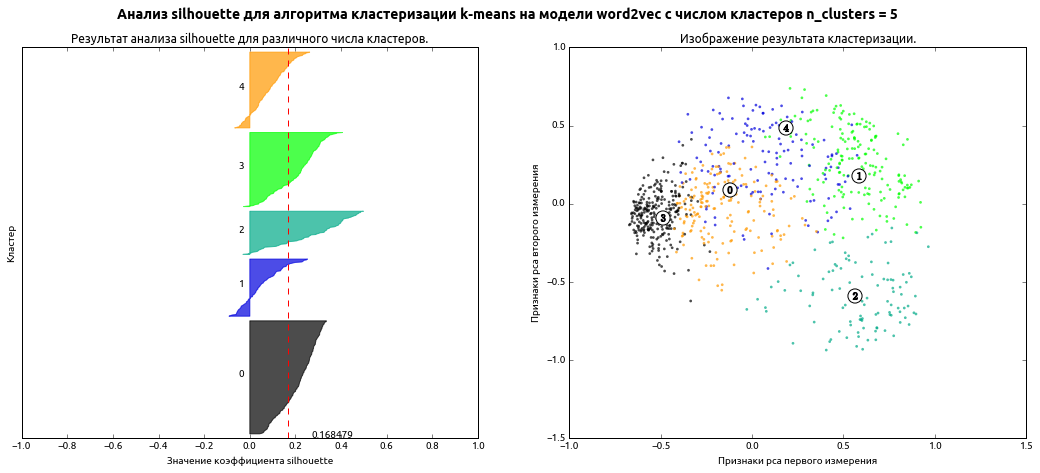

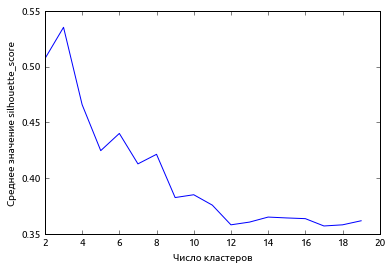

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

plt.rcParams["text.usetex"] = False

X = word_vectors
# range_n_clusters = [2, 3, 4, 5, 10, 30, 50, 100]
range_n_clusters = range(2,6)

for n_clusters in range_n_clusters:
    # Графики состоят из 1 строки и 2 колонок
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Левый график показывает silhouette
    # Коэффициент silhouette может принимать значения из отрезка от -1 до 1 [-1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    clusterer_pca = KMeans(n_clusters=n_clusters, random_state=10)
    clusterer_pca.fit_predict(pca_vectors)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print "Для n_clusters =", n_clusters, "Среднее значение silhouette_score равно:", silhouette_avg 

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(u"Результат анализа silhouette для различного числа кластеров.")
    ax1.set_xlabel(u"Значение коэффициента silhouette")
    ax1.set_ylabel(u"Кластер")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.text(silhouette_avg + 0.1, 0.1, silhouette_avg) #rotation=90

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_vectors[:, 0], pca_vectors[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1],
#                 marker='o', c="white", alpha=1, s=200)
    
    # Labeling the clusters
    centers = clusterer_pca.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title(u"Изображение результата кластеризации.")
    ax2.set_xlabel(u"Признаки pca первого измерения")
    ax2.set_ylabel(u"Признаки pca второго измерения")

    plt.suptitle((u"Анализ silhouette для алгоритма кластеризации k-means на модели word2vec "
                  u"с числом кластеров n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
# График для различного числа кластеров
silhouette = []
max_n_clustrers = 20
for ncenters in range(2, max_n_clustrers):
    clusterer_pca = KMeans(n_clusters=ncenters, random_state=10)
    cluster_labels = clusterer_pca.fit_predict(pca_vectors)
    silhouette_avg = silhouette_score(pca_vectors, cluster_labels)
    print "Для n_clusters =", ncenters, "Среднее значение silhouette_score равно:", silhouette_avg 
    silhouette.append(silhouette_avg)

fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:max_n_clustrers], silhouette)
ax2.set_xlabel(u"Число кластеров")
ax2.set_ylabel(u"Среднее значение silhouette_score")

Кластеризация массива слов с помощью алгоритма **FCM** при *n* (число кластеров) от 2 до 14 (Источник: http://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html#clustering).

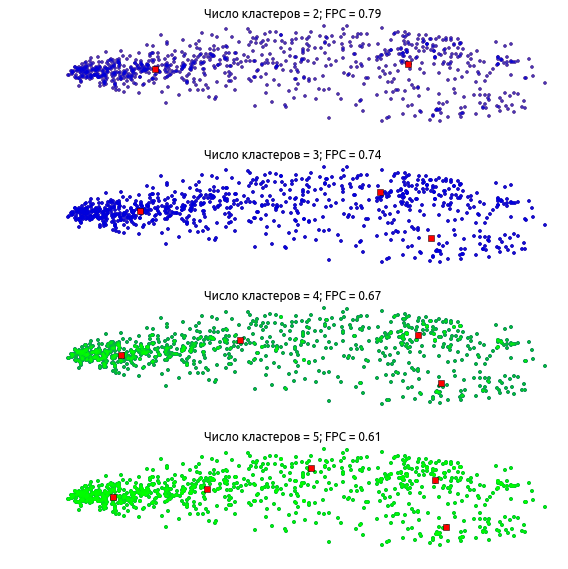

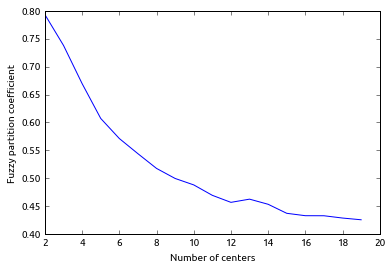

In [10]:
import skfuzzy as fuzz

# Set up the loop and plot
fig1, axes1 = plt.subplots(4, figsize=(8, 8))
alldata = pca_vectors.transpose()
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=1e-4, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(pca_vectors[:, 0],
                pca_vectors[:, 1], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title(u'Число кластеров = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

# График для различного числа кластеров
fpcs = []
max_n_clustrers = 20
for ncenters in range(2, max_n_clustrers):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=1e-4, maxiter=1000, init=None)
    # Store fpc values for later
    fpcs.append(fpc)

fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:max_n_clustrers], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

Как видно из графиков оба алгоритма кластеризации демончтрируют наилучшие результаты при числе кластеров равном 2 или 3.

Слова для числа кластеров равного: 2
Кластер:  0
- нормальный
- система
- баланс
- ничто
- пароль
Кластер:  1
- результат
- свалка
- рассказывать
- екатеринбург
- перевод
Слова для числа кластеров равного: 3
Кластер:  0
- екатеринбург
- перевод
- порядок
- отзыв
- залог
Кластер:  1
- нормальный
- баланс
- ничто
- пароль
- город
Кластер:  2
- система
- результат
- свалка
- рассказывать
- может


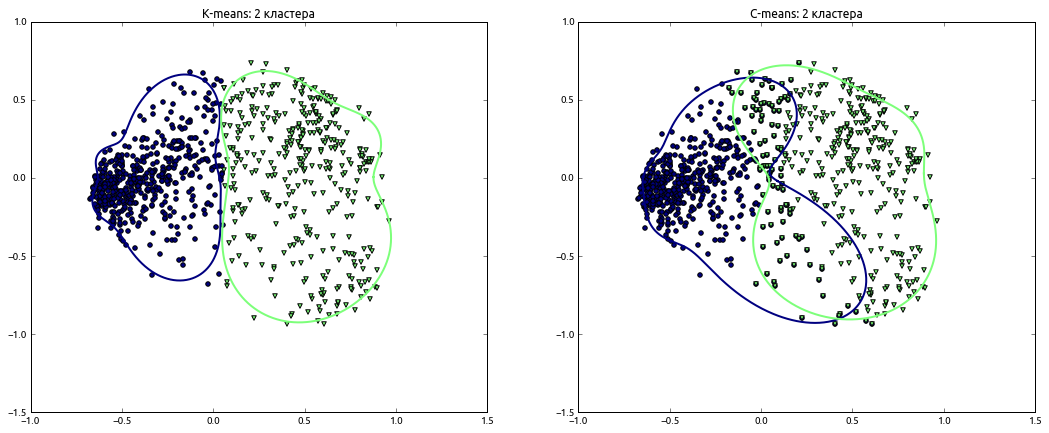

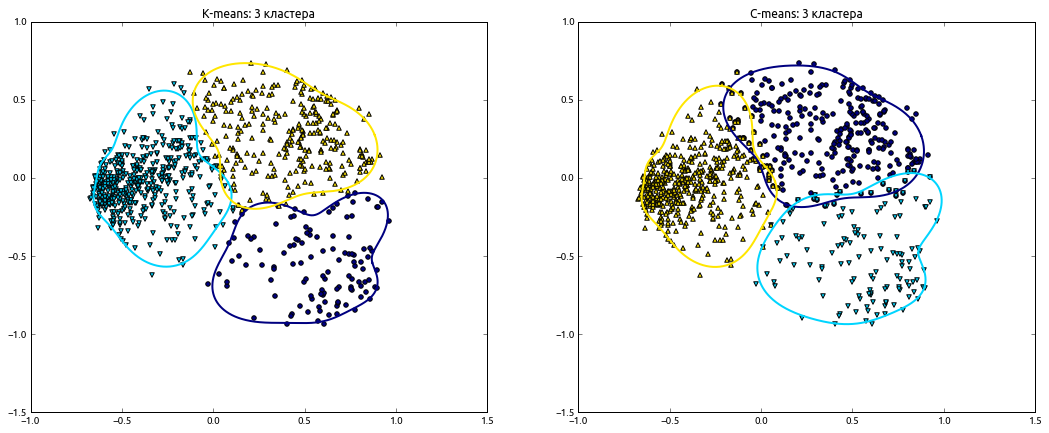

In [27]:
from __future__ import division
import matplotlib.colors as clrs
import matplotlib.cm as cmx
from matplotlib import markers
from src.visualization import find_boundary
from src.fuzzy_clusters import get_clusters

X_transformed = pca_vectors
words_array = np.asarray(words)

for num_clusters in [2, 3]:
    # Графики состоят из 1 строки и 2 колонок
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    kmeans_clustering = KMeans(n_clusters=num_clusters)
    kclusters = kmeans_clustering.fit_predict(word_vectors)
    
    word_vectors_transpose = word_vectors.transpose()
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(alldata,
                                                num_clusters,
                                                2,
                                                error=1e-4,
                                                maxiter=300,
                                                init=None)
    
    cclusters_fuzzy = get_clusters(u, limit=0.35)
    
    jet = cm = plt.get_cmap('jet')
    cNorm = clrs.Normalize(vmin=0, vmax=num_clusters)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    
    print 'Слова для числа кластеров равного:', num_clusters
    
    for i, target_name in zip(range(num_clusters), [str(ix) + ' кластер' for ix in range(num_clusters)]):
        cluster_color = scalarMap.to_rgba(i)
        m = markers.MarkerStyle.filled_markers[i]
        
        ax1.set_title('K-means: ' + str(num_clusters) + u' кластера')

        ax1.scatter(X_transformed[kclusters == i, 0],
                    X_transformed[kclusters == i, 1],
                    marker=m,
                    c=cluster_color
                    )

        x, y = find_boundary(X_transformed[kclusters == i, 0],
                             X_transformed[kclusters == i, 1], 5)
        ax1.plot(x, y, '-k', lw=2., color=cluster_color)
        
        print 'Кластер: ', i         
        for ix_word, w in enumerate(words_array[kclusters == i]):
            if ix_word < 5: print '-',w
            else: break

        ax2.set_title('C-means: ' + str(num_clusters) + u' кластера')
#     ax2.set_xlabel(u"Признаки pca первого измерения")
#     ax2.set_ylabel(u"Признаки pca второго измерения")

        cluster_mask = []
        for cluster_row in cclusters_fuzzy:
            if i in cluster_row:
                cluster_mask.append(True)
            else:
                cluster_mask.append(False)

        cluster_mask = np.asarray(cluster_mask)

        ax2.scatter(X_transformed[cluster_mask, 0],
                    X_transformed[cluster_mask, 1],
                    marker=m,
                    c=cluster_color
                    )
        x, y = find_boundary(X_transformed[cluster_mask, 0],
                             X_transformed[cluster_mask, 1], 5)
        ax2.plot(x, y, '-k', lw=2., color=cluster_color)